<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Graphics" data-toc-modified-id="Graphics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphics</a></span></li></ul></li><li><span><a href="#Getting-Ready" data-toc-modified-id="Getting-Ready-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Ready</a></span><ul class="toc-item"><li><span><a href="#Base-Integrator-Settings" data-toc-modified-id="Base-Integrator-Settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base Integrator Settings</a></span></li><li><span><a href="#Initial-Conditions" data-toc-modified-id="Initial-Conditions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initial Conditions</a></span></li></ul></li><li><span><a href="#Batch-Execution" data-toc-modified-id="Batch-Execution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Batch Execution</a></span></li><li><span><a href="#Batch-Processing." data-toc-modified-id="Batch-Processing.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Batch Processing.</a></span><ul class="toc-item"><li><span><a href="#Orbital-Radius-Decay-Diagram" data-toc-modified-id="Orbital-Radius-Decay-Diagram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Orbital Radius Decay Diagram</a></span></li><li><span><a href="#Lowest-Energy-Achieved" data-toc-modified-id="Lowest-Energy-Achieved-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Lowest Energy Achieved</a></span></li><li><span><a href="#Loading-Single" data-toc-modified-id="Loading-Single-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Loading Single</a></span></li><li><span><a href="#2D-Preview" data-toc-modified-id="2D-Preview-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>2D Preview</a></span></li></ul></li></ul></div>

# Initialization

In [1]:
###### Do not touch
MinVersion = 23

import PyUltraLight2 as PyUL

if (PyUL.S_version < MinVersion):
    raise RuntimeError("You need the latest PyULN!")

import numpy as np

np.set_printoptions(suppress=True)

import math

import numba
import numexpr as ne
import time
import pyfftw
import os
import sys
import multiprocessing
import numpy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText

import IPython
from IPython.core.display import clear_output, display, Video

from numpy import sqrt, exp, log, log10, sin, cos, tan, pi

%reload_ext autoreload
%autoreload 2


# Useful Aux Functions
ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

printU = PyUL.printU


m22 = PyUL.axion_E / 1e-22

printU(f"m22 = {m22:.3g}", 'universe')

Axion Mass (eV).1e-21
PyUL2.Universe: Axion Mass: 1e-21 eV.
PyUL2.23.12: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037
PyUL2.universe: m22 = 10


## Graphics

In [65]:
plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["text.usetex"]= False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'w'

from matplotlib.colors import LinearSegmentedColormap
Palette = 'magma'
cyccol=['#000000', '#ffffff','#000000']
divcol=['#003262','#005b96','#ffffff','#d5a756','#B51700']
divcols=['#005b96','#ffffff','#d5a756']

CycPalette = LinearSegmentedColormap.from_list('myCyc', cyccol)

DivPalette  = LinearSegmentedColormap.from_list('myDiv', divcol)
DivPaletteS  = LinearSegmentedColormap.from_list('myDiv', divcols)

EFigSize = (10,12)
EFigSizeMono = (10,6)
VideoSize = (8,8)
FPS = 10
DPI = 72

FrameCap = 60 # Maximum Number of Frames to Animate

########################################

# BH Trajectory

Colors = np.array([[209,17,65],[0,177,89],[0,174,219],[243,119,53],[255,196,37]])/255

# NBody
ENStyle = '-'
ENColor = '#ff6c0e' # NBody

EKColor = '#8dd9e7'
EPColor = '#fd8dc8'

# ULDM
EUStyle = '-'
EUColor = '#7f1717' # ULDM

EQColor = '#ccb603' # Kinetic 
ERColor = '#6cc25c' # Self-Interaction
EGColor = '#2c8899' # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#080808'

# Auxiliary 
HelperStyle = 'k.'
EmphColor = 'black'
GeomColor = 'olivedrab'

# Getting Ready

## Base Integrator Settings

In [3]:
resol = 128

length, length_units = 4.5, 'kpc' #
duration, duration_units = 1, 'Gyr' #

start_time = 0. # For solitons only: Pre-evolve the wavefunction phase.

NS = 32

save_format = 'npy' # npy, npz, hdf5

step_factor = 1 # Keep it on default

save_number = -1

PyUL.DispN(duration,duration_units,length,length_units,resol,step_factor,save_number)

# You can also set it to 'Minimum' to only save all 1D mesh Data.
Save_Options = 'Energy NBody DF'

#This Boolean List is for program's internal use
save_options = PyUL.SaveOptionsDigest(Save_Options)

s_mass_unit = 'M_solar_masses'
s_position_unit = 'kpc'
s_velocity_unit = 'km/s' 
m_mass_unit = s_mass_unit
m_position_unit = s_position_unit
m_velocity_unit = s_velocity_unit


Uniform = False # if True, then there won't be solitons.
Density = 0
UVel = [0,0,0] # Uses s_velocity_units
density_unit = '' # Accepted units: 'MSol/pc3', 'kg/m3', and '' for dimensionless units

The required number of ULDM steps is 4980
The actual ULDM steps is 4980


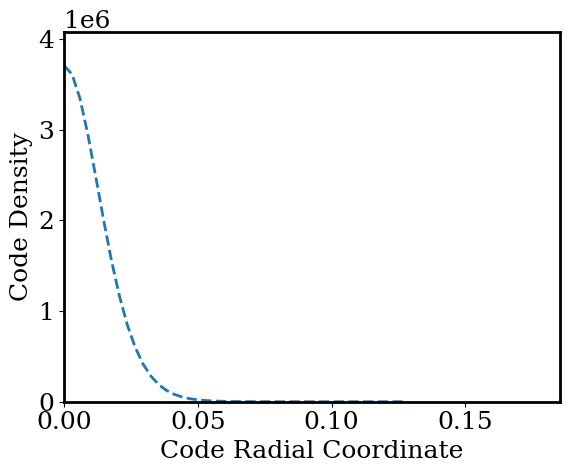

In [4]:
mS = 12 # User Input

Phase = 0 # Multiples of pi

HWHM = PyUL.SolitonSizeEstimate(mS,length,resol,s_mass_unit,length_units, Plot = True)

In [ ]:
print(HWHM)
PyUL.convert_back(HWHM,'kpc','l')

In [ ]:
r0 = 0.27971

MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, length_units, mS, s_mass_unit, r0,
                                              m_position_unit, m_velocity_unit, Detail = int(7e4))
       
    
print(MIn/mS)

## Initial Conditions

In [ ]:
save_path = 'Batches/MR_Final_Lowres'

PyUL.DSManagement(save_path, Force = False)

In [ ]:
RatioList = [0.005, 0.01, 0.02, 0.04, 0.08]
RadiusList = [0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3]

N = len(RatioList) * len(RadiusList)

I = 0

Laps = 10

Seq = 0

MInLog = []

for i in range(len(RadiusList)):
    
    r0 = RadiusList[i]
    
    for j in range(len(RatioList)):
        
        clear_output()
        I+=1
        
        Ratio = RatioList[j]

        gridspace = PyUL.MeshSpacing(resol,length,length_units, silent = True)
        
        rP = 1/2 * gridspace

        a = PyUL.GenPlummer(rP,length_units)

        mP = mS * Ratio# User Input
        
        
        MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, length_units, mS, s_mass_unit, r0,
                                              m_position_unit, m_velocity_unit, Detail = int(7e4))
        
        M = mS + mP
        # Unit 1
        y1 = 0
        x1 = r0*mS/M
        yDot1 = vRel0*mS/M

        # Unit 2
        y2 = 0
        x2 = r0*mP/M
        yDot2 = vRel0*mP/M

        embeds    = []

        particles =  [[mP,[x1,y1,0],[0,-yDot1,0]]]
        solitons  =  [[mS,[-x2,-y2,0],[0,yDot2,0],Phase*np.pi]]


        
        duration = Laps * PyUL.convert_back(2*np.pi*PyUL.convert(r0,length_units,'l') / PyUL.convert(vRel0,m_velocity_unit,'v'),duration_units,'t')
        
        print(f'Included Mass Ratio = {MIn/mS:.2%} @ r = {r0}\n==')
        print(f'T = {duration:.5f} {duration_units}')
        #================================================================

        Name = f'{Seq:02d}_M{Ratio}_R{r0}'
        Seq+=1
        Initpath = ''

        run_folder = PyUL.GenerateConfig(NS, length, length_units,
                                         resol, duration, duration_units, step_factor,
                                         save_number, Save_Options, save_path,
                                         save_format, s_mass_unit, s_position_unit,
                                         s_velocity_unit, solitons,start_time,
                                         m_mass_unit, m_position_unit, m_velocity_unit,
                                         particles,embeds, Uniform,Density,density_unit,
                                         a,UVel,True,Name)
    MInLog.append(MIn)
    
np.save(f'{save_path}/IncludedMass.npy', np.array(MInLog))

printU('Saved inside mass','IO')
        
print('Done!', f'Initialized {I} simulations.')

[**Back to the Top**](#root)
<a id='run'></a>
# Batch Execution

This creates a timestamped folder using the current settings, and the integrator stores all requested files in it too.

In [ ]:
FullSim = True
Shift = False
T0 = time.time()
runs = os.listdir(save_path)
runs.sort()

NRuns = len(runs)

Run = 0

for run_folder in runs:
    
    if os.path.isdir(f'{save_path}/{run_folder}'):
        
        RunText = f'Simulation #{Run+1} out of {NRuns}'
        PyUL.evolve(save_path,run_folder,
            NBodyInterp = FullSim, SelfGravity = FullSim, NBodyGravity = True, 
            Silent = True, Shift = Shift, AutoStop = False, AutoStop2 = False, Message = RunText,
                   Stream = False, StreamChar = [1,4])

        Run +=1

        print(f'Simulation {Run} finished.')
        time.sleep(2)
        
import IPython
IPython.display.Audio("Done.mp3",autoplay=True)

print(f"{time.time()-T0:.3g}s")
printU('Please copy this into analysis notebook\n\nbatch_path = \''+batch_path+'\'','Export')

# Batch Processing.

In [3]:
### Initializing Journaling Variables

#### Dummies and Aux
TimeLog = [] # Time Series
ResoLog = [] # Resolutions
PlRaLog = [] # Plummer Radii

#### Core Variables
IniRLog = [] # Initial Radius Handle
MaRaLog = [] # Mass Ratio Handle

TMMaLog = [] # NBody Mass

DyTSLog = [] # Dynamical Timescale (Corrected by C)
IniDLog = [] # Initial Density
MEncLog = []

TMAcLog = [] # Nbody Acceleration
TMDSLog = [] # Nbody Traj
TMDVLog = [] # Nbody Velocity

# Energies

TMEKLog = [] # BH Kinetic
TMEPLog = [] # BH Potential (Due to ULDM)

ULEKLog = [] # ULDM KQ (Kinetic and Quantum)
ULEPLog = [] # ULDM Self-Grav

SysELog = [] # System Total Energy

Run = 0


In [4]:
save_path = './Batches/' + PyUL.Runs('./Batches', Automatic = False)

runs = os.listdir(save_path)
runs.sort()

Time = time.time()

for run_folder in runs:
    loc = './' + save_path + '/' + run_folder
    if os.path.isdir(loc):
        
        # Reload Config.. Why don't I use a class?
        NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, UVel = PyUL.LoadConfig(loc)

        if save_number == -1:
            sim_number = PyUL.ULDStepEst(duration,duration_units,
                                                  length,length_units,
                                                  resol,step_factor, 
                                                  save_number = -1)
        else:
            sim_number = save_number

        # Dict of Run Data
        EndNum, Loaded = PyUL.Load_npys(loc,save_options)

        TMdata = Loaded['NBody']
        
        AccData = Loaded['DF']
        
        
        Loaded = {}

        NBo = len(particles)

        # Time
        durationMyr = CB(duration,duration_units,'Myr','t')

        # Space
        lengthKpc = CB(length,length_units,'kpc','l')
        lengthC = ToCode(length,length_units,'l')

        # Mass

        MassList_MSol = []
        MassListSI = []
        for TM in particles:
            MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
            MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))

        # Density
        DensitySI = CB(Density,density_unit,'kg/m3','d')
        DensityC = ToCode(Density,density_unit,'d')

        ## Misc. Pre-Multipliers


        # NBody_State Vector

        XPre = ToPhys(1,'kpc','l')
        VPre = ToPhys(1,'km/s','v')

        XPreSI = ToPhys(1,'m','l')
        VPreSI = ToPhys(1,'m/s','v')

        IArray = np.arange(len(TMdata[0]))

        # Dimensionful NBody State

        TMDataS = np.array(TMdata)
        TMDataSI = np.array(TMdata)

        TMDataS[:,IArray % 6 <= 2] *= XPre
        TMDataS[:,IArray % 6 >= 3] *= VPre


        TMDataSI[:,IArray % 6 <= 2] *= XPreSI
        TMDataSI[:,IArray % 6 >= 3] *= VPreSI


        # Rho data
        DPre = CB(1,density_unit,'kg/m3','d')
        # Energy
        EPre = PyUL.energy_unit
        # Field Strength
        PPre = PyUL.mass_unit / PyUL.length_unit
        
        
        # Acceleration
        APre = PyUL.length_unit/PyUL.time_unit**2
        
        AccDataSI = np.array(AccData) * APre
        AccDataSI[0,:] = AccDataSI[1,:] # not a good fix but doesn't matter
        # U ENERGY
        
        # Total Energy from Integrator
        egylist = np.load('{}{}'.format(loc, '/Outputs/egylist.npy'),allow_pickle=True) * EPre

        # Energy Due to N Body Potential
        egpcmlist =  np.load('{}{}'.format(loc, '/Outputs/egpcmMlist.npy'),allow_pickle=True) * EPre # NEW
        egpcmlist2 = np.load('{}{}'.format(loc, '/Outputs/egpcmlist.npy'),allow_pickle=True) * EPre # OLD

        # Energy Due to ULDM Self-Interaction
        egpsilist = np.load('{}{}'.format(loc, '/Outputs/egpsilist.npy'),allow_pickle=True) * EPre

        # Energy Due to Quantum Fun
        ekandqlist = np.load('{}{}'.format(loc, '/Outputs/ekandqlist.npy'),allow_pickle=True) * EPre

        mtotlist = np.load('{}{}'.format(loc, '/Outputs/masseslist.npy'),allow_pickle=True) * EPre


        # Translating Snapshots back to Time
        
        timerange = np.linspace(0,durationMyr,save_number+1)

        Tp = np.arange(EndNum)

        Tp = Tp * durationMyr / (sim_number+1)

        TpSec = PyUL.convert_between(Tp,'Myr','s','t')
        
        NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum, a, length_units)
        rP = PyUL.RecPlummer(a,length_units)
        
        # Section 5 Key Information Recreation
        
        mP = PyUL.convert(particles[0][0],m_mass_unit,'m')
        
        mS = PyUL.convert(solitons[0][0],s_mass_unit,'m')
        
        xP = np.array(particles[0][1])
        sP = np.array(solitons[0][1])
        
        xPC = PyUL.convert(xP,m_position_unit,'l')
        sPC = PyUL.convert(sP,s_position_unit,'l')
        
        rC = np.linalg.norm(xPC-sPC)
        
        rU = PyUL.convert_back(rC,'kpc','l')
        
        MaRa = mP / mS
        
        MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, 
                                              length_units, mS, '', rC, '', m_velocity_unit)
        
        MInSI = PyUL.convert_between(MIn,s_mass_unit,'kg','m')
        vRel0SI = PyUL.convert_between(vRel0,m_velocity_unit,'m/s','v')
        MBHSI = PyUL.convert_between(mP,m_mass_unit,'kg','m')
        RSI = PyUL.convert_between(rC,'','m','l')
        
        Density0 = PyUL.ReadLocalDensity(loc)
        DensitySI = PyUL.convert_between(Density0,'','kg/m3','d')
        
        print(MInSI, vRel0SI, MBHSI, RSI, DensitySI)
        
        T = PyUL.convert_between((MInSI)**(3/2) / (4*pi*np.sqrt(PyUL.G)*MBHSI*DensitySI*RSI**(3/2)),'s','Myr','t')

        print(T, 'Myr')
        
        CLow = 1/3 * (PyUL.axion_mass / PyUL.hbar)**2 * PyUL.G*RSI*MInSI
                
        TimeLog.append(Tp)
        ResoLog.append(resol)
        PlRaLog.append(rP)
        
        TMMaLog.append(mP)
        TMDSLog.append(TMDataS[:,0:3])
        TMDVLog.append(TMDataS[:,3:6])
                
        DyTSLog.append(T/CLow)
        IniDLog.append(DensitySI)

        #
        
        IniRLog.append(np.round(rU,4))
        MaRaLog.append(np.round(MaRa,4))
        MEncLog.append(MIn/mS)
        
        
        # Energy
        
        MES = (PS + KS)
        MESD = PyUL.GetRel(MES)

        EKQD = PyUL.GetRel(ekandqlist)
        EGPD = PyUL.GetRel(egpsilist)

        ECMD = PyUL.GetRel(egpcmlist)
        ECOD = PyUL.GetRel(egpcmlist2)

        KSD = PyUL.GetRel(KS)
        PSD = PyUL.GetRel(PS)

        EUOld  = egylist
        EUOldD = PyUL.GetRel(EUOld)

        EUNew  = egpsilist + ekandqlist + egpcmlist2
        EUNewD = PyUL.GetRel(EUNew)

        ETOld  = EUOld + MES
        ETOldD = PyUL.GetRel(ETOld)

        ETNew  = EUNew + MES

        TMEKLog.append(MES)
        TMEPLog.append(egpcmlist2)
        
        ULEKLog.append(ekandqlist)
        ULEPLog.append(egpsilist)
        
        SysELog.append(ETNew)

        TMAcLog.append(AccDataSI)
        
        
        Run += 1
        
        clear_output()
        
        
printU('Processing Complete!','IO')

printU(f'{time.time() - Time:.3f}s','Time')

PyUL2.   IO: Processing Complete!
PyUL2. Time: 9.459s


In [5]:
len(DyTSLog)

45

In [6]:
InterpolateCurve = PyUL.InterpolateCurve

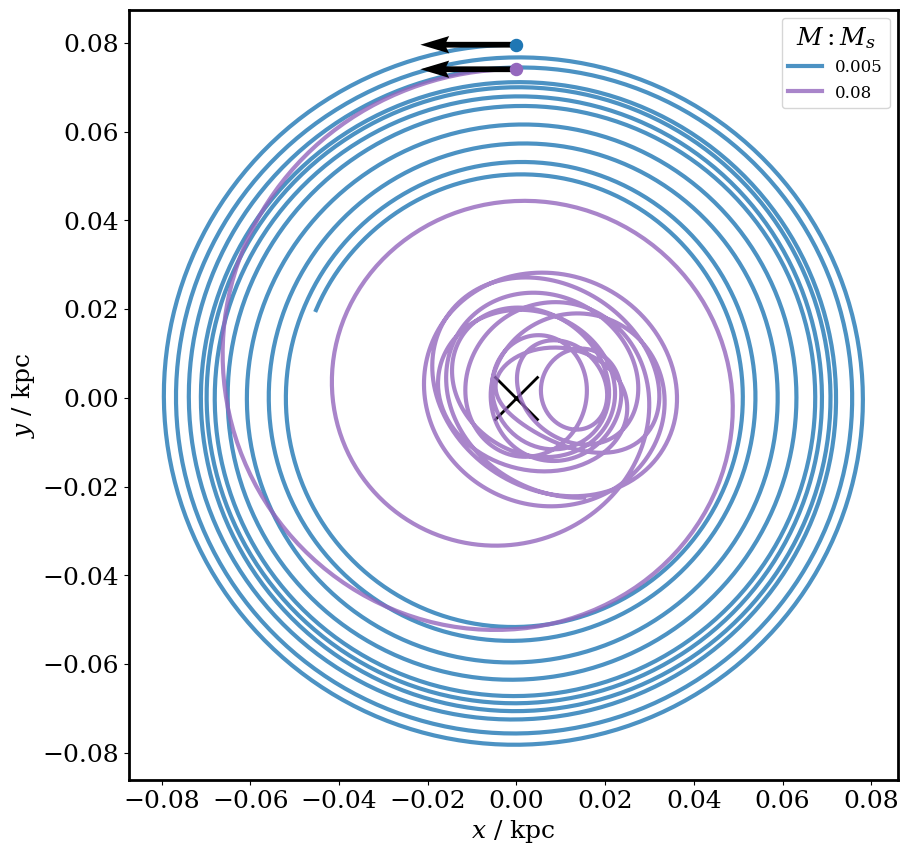

In [7]:
fig = plt.figure(figsize = (10,10), dpi = 100)

BaseGrid = plt.GridSpec(2, 1, hspace=.05)

ax = fig.add_subplot(111)
#axE = fig.add_subplot(BaseGrid[1,0])

ax.set_aspect('equal')

RadSlice = 0

def ConditionT(i):
    
    return (IniRLog[i] == 0.08) and ((MaRaLog[i]==0.08) or (MaRaLog[i]== 0.005))

def ConditionE(i):
    
    return ConditionT(i)


for i in range(len(ResoLog)):
    
    Data = TMDSLog[i]

    #if ConditionT(i):
    if IniRLog[i] == 0.08 and ((MaRaLog[i]==0.08) or (MaRaLog[i]== 0.005)):
    
        TraX, TraY = InterpolateCurve(Data[:,1],Data[:,0])

        ax.plot(TraX,TraY, lw =3,alpha = 0.8,label = MaRaLog[i])
        
        ax.scatter(TraX[0],TraY[0], s =75, zorder = 10)
        ax.quiver(TraX[0],TraY[0],-1,0,zorder = 9, scale = 8)
        
    if IniRLog[i] == 0.08 and not ((MaRaLog[i]==0.08) or (MaRaLog[i]== 0.005)):
        
        ax.plot([],[])
        ax.scatter([],[])

ax.scatter(0,0,marker = 'x', s = 1000, color = 'k')
#axE.legend(fontsize= 7)


lengthSI = PyUL.convert_between(lengthKpc,'kpc','m','l')

#Zoom = 6

#ax.set_xlim(-lengthSI/2/Zoom,lengthSI/2/Zoom)
#ax.set_ylim(-lengthSI/2/Zoom,lengthSI/2/Zoom)

ax.set_xlabel('$x$ / kpc')
ax.set_ylabel('$y$ / kpc')

ax.legend(title = '$M:M_s$', fontsize = 12)


(0.0, 1250.0)

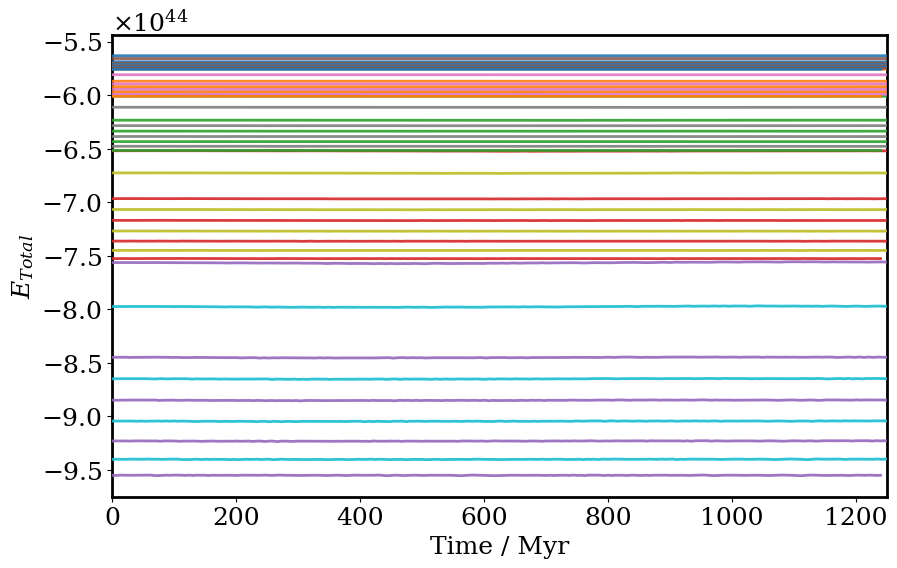

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for i in range(len(ResoLog)):

    ax.plot(TimeLog[i],SysELog[i],label = f'${ResoLog[i]}^3$',alpha = 0.9,zorder = 100-i) 
        
ax.set_ylabel('$E_{Total}$')
ax.set_xlabel('Time / Myr')

#ax.legend(ncol=3,fontsize = 12,loc = 8)

#ax.set_ylim(-0.0009,0.0009)
#ax.set_yticks([-0.0005,0,0.0005])

ax.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

plt.xlim(0,1250)

(0.0, 1250.0)

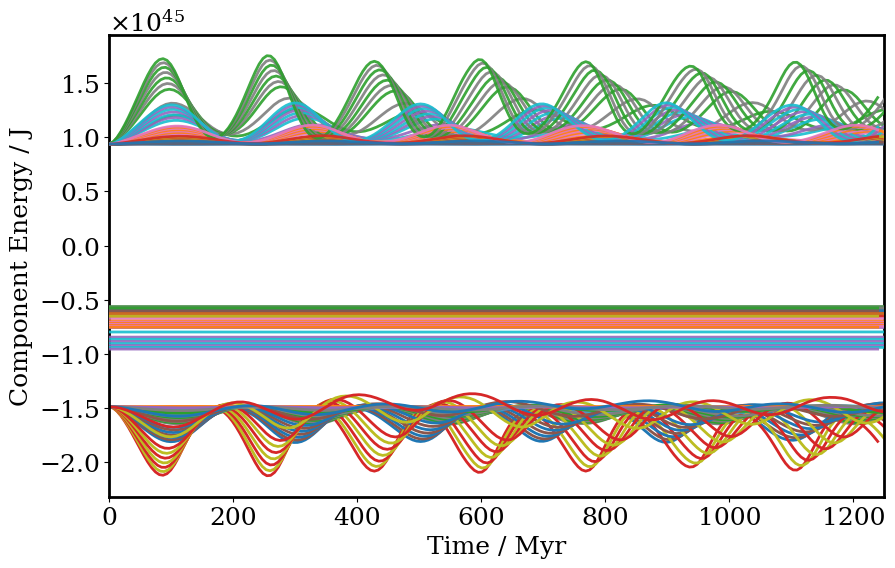

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for i in range(len(ResoLog)):

    ax.plot(TimeLog[i],ULEKLog[i],label = f'${ResoLog[i]}^3$',alpha = 0.9,zorder = 100-i) 
    ax.plot(TimeLog[i],ULEPLog[i]) 
    
    ax.plot(TimeLog[i],SysELog[i],label = f'${ResoLog[i]}^3$',alpha = 0.9,zorder = 100-i) 
     
ax.set_ylabel('Component Energy / J')
ax.set_xlabel('Time / Myr')

#ax.legend(ncol=3,fontsize = 12,loc = 8)

#ax.set_ylim(-0.0009,0.0009)
#ax.set_yticks([-0.0005,0,0.0005])

ax.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

plt.xlim(0,1250)

(0.0, 1250.0)

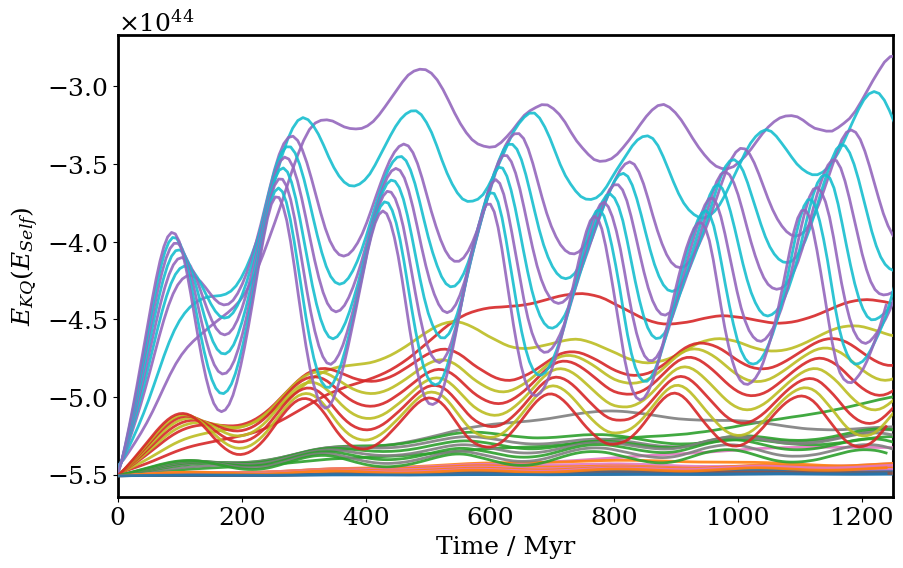

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for i in range(len(ResoLog)):

    ax.plot(TimeLog[i],ULEKLog[i]+ULEPLog[i],alpha = 0.9,zorder = 100-i) 
    
ax.set_ylabel('$E_{KQ} (E_{Self}) $')
ax.set_xlabel('Time / Myr')

#ax.legend(ncol=3,fontsize = 12,loc = 8)

#ax.set_ylim(-0.0009,0.0009)
#ax.set_yticks([-0.0005,0,0.0005])

ax.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

plt.xlim(0,1250)

(0.0, 1250.0)

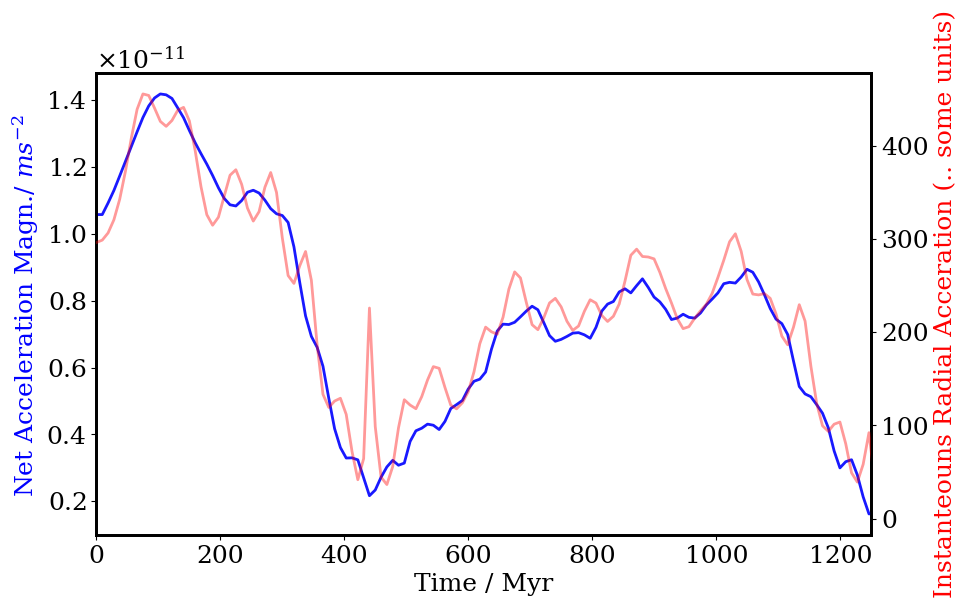

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

secaxy = ax.twinx()

for i in range(len(ResoLog)):
    
    if MaRaLog[i] == 0.08 and IniRLog[i] == 0.3:

        AccMagn = np.sqrt(TMAcLog[i][:,0]**2 + TMAcLog[i][:,1]**2 + TMAcLog[i][:,2]**2)
        
        VelMagn = np.sqrt(TMDVLog[i][:,0]**2 + TMDVLog[i][:,1]**2 + TMDVLog[i][:,2]**2)
        
        TraX, TraY = Data[:,1],Data[:,0]
    
        Radius = np.sqrt(TraX**2+TraY**2)
        
        ExpA = VelMagn**2 / Radius
        
        ax.plot(TimeLog[i],AccMagn,label = f'${ResoLog[i]}^3$',alpha = 0.9,zorder = 100-i, color = 'b') 
        
        
        secaxy.plot(TimeLog[i],ExpA,label = f'${ResoLog[i]}^3$',alpha = 0.4,zorder = 100-i, color = 'r')

ax.set_ylabel('Net Acceleration Magn./ $m s^{-2}$ ', color = 'b')
ax.set_xlabel('Time / Myr')

#ax.legend(ncol=3,fontsize = 12,loc = 8)

#ax.set_ylim(-0.0009,0.0009)
#ax.set_yticks([-0.0005,0,0.0005])

ax.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

secaxy.set_ylabel('Instanteouns Radial Acceration (.. some units)', color = 'r')

plt.xlim(0,1250)

(0.0, 1250.0)

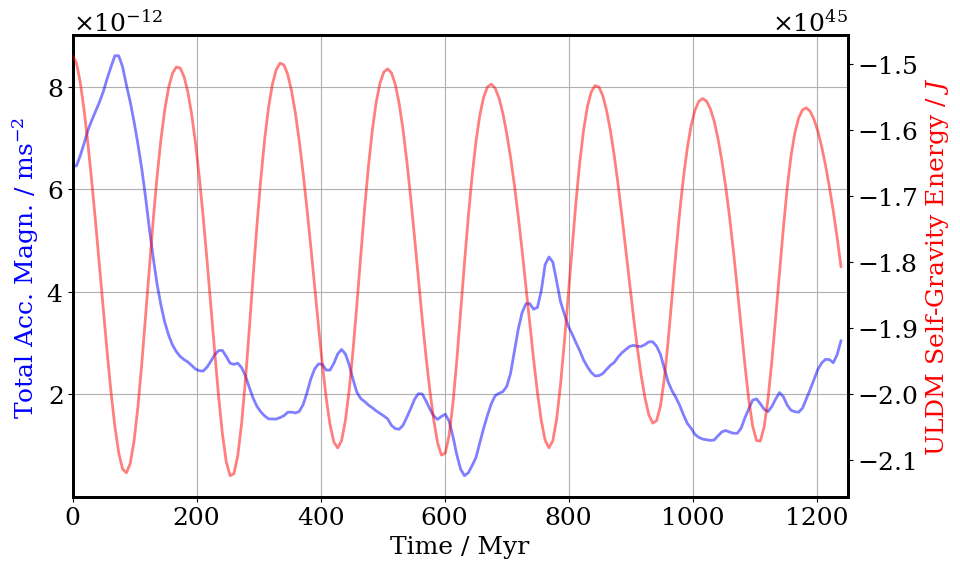

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

secaxy = ax.twinx()

for i in range(len(ResoLog)):
    
    if MaRaLog[i] == 0.08 and IniRLog[i] == 0.08:

        AccMagn = np.sqrt(TMAcLog[i][:,0]**2 + TMAcLog[i][:,1]**2 + TMAcLog[i][:,2]**2)        
        ax.plot(TimeLog[i],AccMagn,label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i, color = 'b') 
        
        secaxy.plot(TimeLog[i],ULEPLog[i],label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i, color = 'r')

ax.set_ylabel('Total Acc. Magn. / ms$^{-2}$ ', color = 'b')
ax.set_xlabel('Time / Myr')


ax.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))
secaxy.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

secaxy.set_ylabel('ULDM Self-Gravity Energy / $J$', color = 'r')

ax.grid()
plt.xlim(0,1250)

<Figure size 1000x600 with 0 Axes>

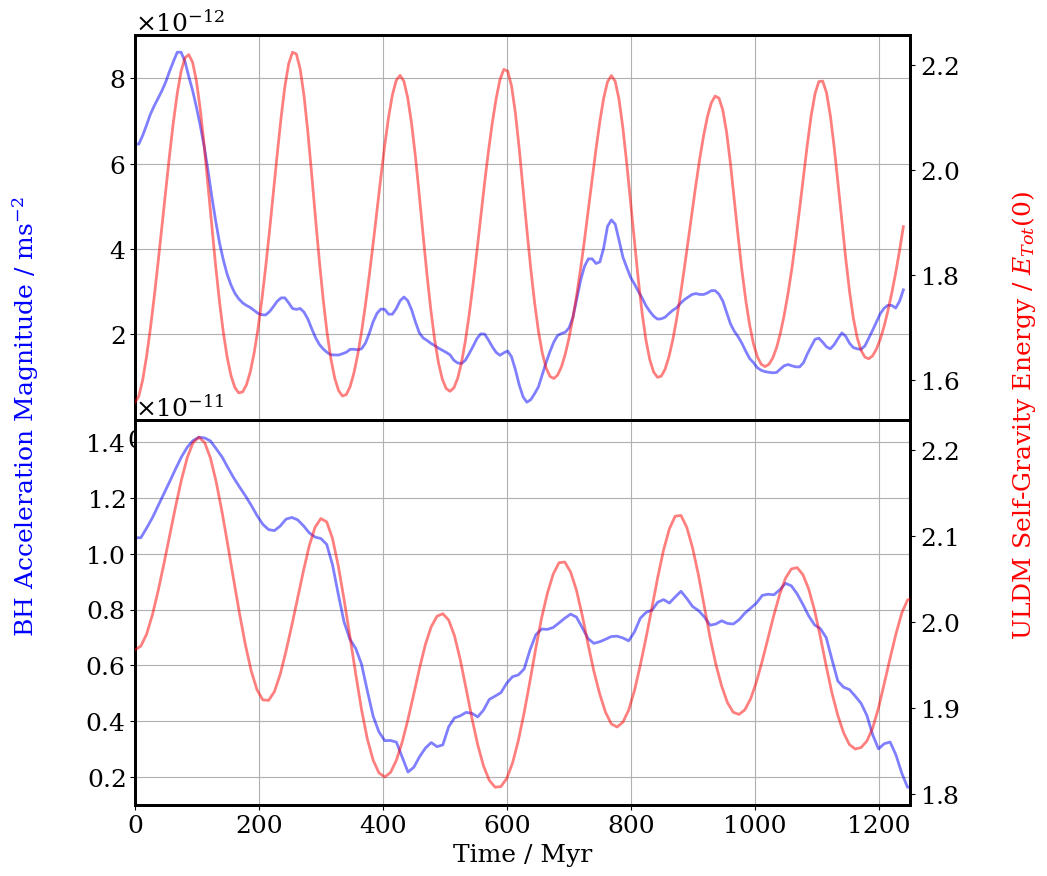

In [48]:
fig = plt.figure(figsize=(10,6))

fig = plt.figure(figsize = (10,10))
BaseGrid = plt.GridSpec(2,1, hspace = 0)

ax1 = fig.add_subplot(BaseGrid[0,0])
ax2 = fig.add_subplot(BaseGrid[1,0], sharex = ax1)


ax1s = ax1.twinx()

for i in range(len(ResoLog)):
    
    if MaRaLog[i] == 0.08 and IniRLog[i] == 0.08:

        AccMagn = np.sqrt(TMAcLog[i][:,0]**2 + TMAcLog[i][:,1]**2 + TMAcLog[i][:,2]**2)        
        ax1.plot(TimeLog[i],AccMagn,label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i, color = 'b') 
        
        ax1s.plot(TimeLog[i],ULEPLog[i]/SysELog[i][0],label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i, color = 'r')

ax1.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))
ax1s.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

ax1.grid()
ax1.set_xlim(0,1250)



ax2s = ax2.twinx()

for i in range(len(ResoLog)):
    
    if MaRaLog[i] == 0.08 and IniRLog[i] == 0.3:

        AccMagn = np.sqrt(TMAcLog[i][:,0]**2 + TMAcLog[i][:,1]**2 + TMAcLog[i][:,2]**2)        
        ax2.plot(TimeLog[i],AccMagn,label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i, color = 'b') 
        
        ax2s.plot(TimeLog[i],ULEPLog[i]/SysELog[i][0],label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i, color = 'r')




ax2.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))
ax2s.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))


fig.text(0,0.5,'BH Acceleration Magnitude / ms$^{-2}$ ', color = 'b', rotation = 90, va = 'center')
fig.text(1,0.5,'ULDM Self-Gravity Energy / $E_{Tot}(0)$', color = 'r', rotation = 90, va = 'center')

ax2.set_xlabel('Time / Myr')


ax2.grid()

<Figure size 1000x600 with 0 Axes>

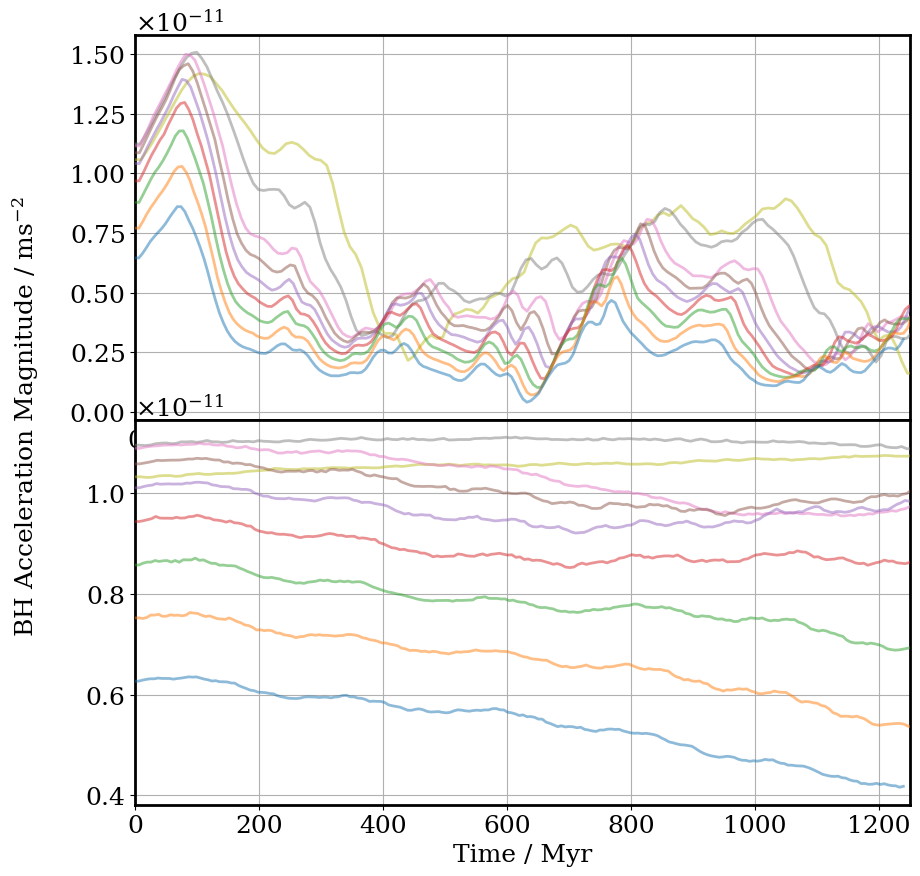

In [55]:
fig = plt.figure(figsize=(10,6))

fig = plt.figure(figsize = (10,10))
BaseGrid = plt.GridSpec(2,1, hspace = 0)

ax1 = fig.add_subplot(BaseGrid[0,0])
ax2 = fig.add_subplot(BaseGrid[1,0], sharex = ax1)



for i in range(len(ResoLog)):
    
    if MaRaLog[i] == 0.08:

        AccMagn = np.sqrt(TMAcLog[i][:,0]**2 + TMAcLog[i][:,1]**2 + TMAcLog[i][:,2]**2)        
        ax1.plot(TimeLog[i],AccMagn,label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i) 
        

ax1.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))

ax1.grid()
ax1.set_xlim(0,1250)


for i in range(len(ResoLog)):
    
    if MaRaLog[i] == 0.005 :

        AccMagn = np.sqrt(TMAcLog[i][:,0]**2 + TMAcLog[i][:,1]**2 + TMAcLog[i][:,2]**2)        
        ax2.plot(TimeLog[i],AccMagn,label = f'${ResoLog[i]}^3$',alpha = 0.5,zorder = 100-i) 
        

ax2.ticklabel_format(axis='y',style = 'sci',useMathText=True,scilimits = (-1,1))


fig.text(0,0.5,'BH Acceleration Magnitude / ms$^{-2}$ ', rotation = 90, va = 'center')

ax2.set_xlabel('Time / Myr')

ax2.grid()

NameError: name 'TMDNLog' is not defined

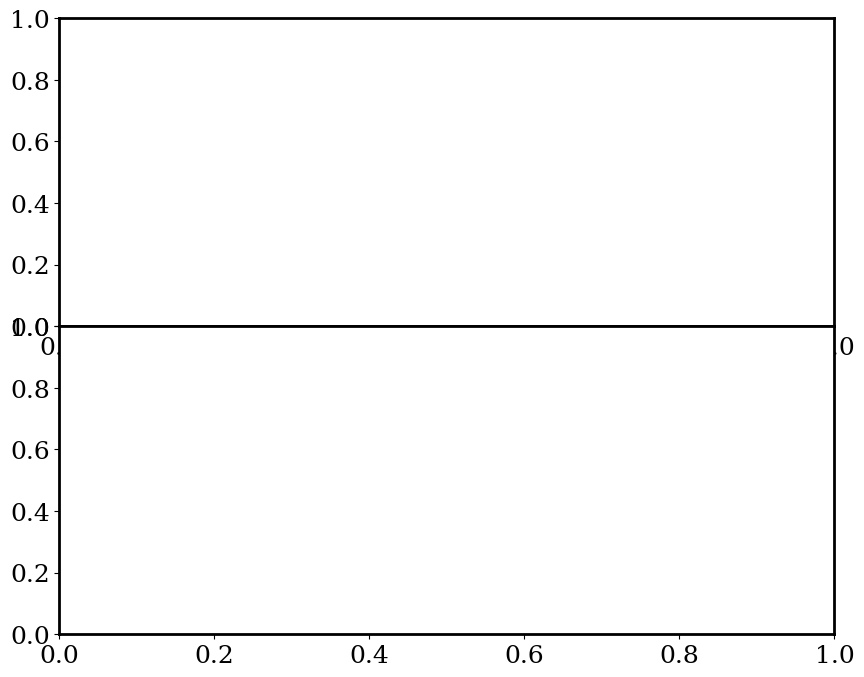

In [49]:
fig = plt.figure(figsize = (10,8), dpi = 100)

BaseGrid = plt.GridSpec(2,1, hspace=0)

axK = fig.add_subplot(BaseGrid[0,0])
axP = fig.add_subplot(BaseGrid[1,0],sharex = axK)

for i in range(len(ResoLog)):
    
    if IniRLog[i] == 0.08:
   #plt.plot(TimeLog[i],TMDNLog[i])
   #plt.plot(TimeLog[i],TMDPLog[i]/TMDPLog[i][0])
        
        axK.plot(TimeLog[i],TMDNLog[i]/TMDNLog[i][0],label = MaRaLog[i])
        #axP.plot(TimeLog[i],TMDFLog[i]/TMDNLog[i][0])
        axP.plot(TimeLog[i],TMDPLog[i]/TMDNLog[i][0])

#plt.xlim(0,1800)
axK.set_ylabel('$E_k$ / $E_k(0)$')
axP.set_ylabel('$E_P$ / $E_k(0)$')

axK.ticklabel_format(axis='y',style = 'sci',useMathText=True)
axP.ticklabel_format(axis='y',style = 'sci',useMathText=True)

axK.legend(title = '$M:M_s$', fontsize = 12)

plt.xlabel('Time / Myr')
plt.xlim(0,1250)

In [ ]:
EDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    EDig.append(np.max(TMDFLog[i]/TMDFLog[i][0]))    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
EDig = np.array(EDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (10,7))

plt.imshow(EDig, origin = 'lower', aspect = 'auto',
           vmin = 1,cmap = 'Spectral')
          #interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),MEnList)

plt.xlabel('$M/M_S$')
plt.ylabel('$Enclosed Soliton Mass %')

plt.colorbar(label = 'min$(E_{BH})/E_{BH}(0)$')

In [ ]:
TYDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    TYDig.append(DyTSLog[i])    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
TYDig = np.array(TYDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (10,7))

plt.imshow(TYDig, origin = 'lower', aspect = 'auto',
           vmin = 0,cmap = 'Spectral')
          #interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),MEnList)

plt.xlabel('$M/M_S$')
plt.ylabel('Enclosed Soliton Mass %')

plt.colorbar(label = 'Hui\'s Dynamic Timescale / Myr')

[0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.25 0.3 ]


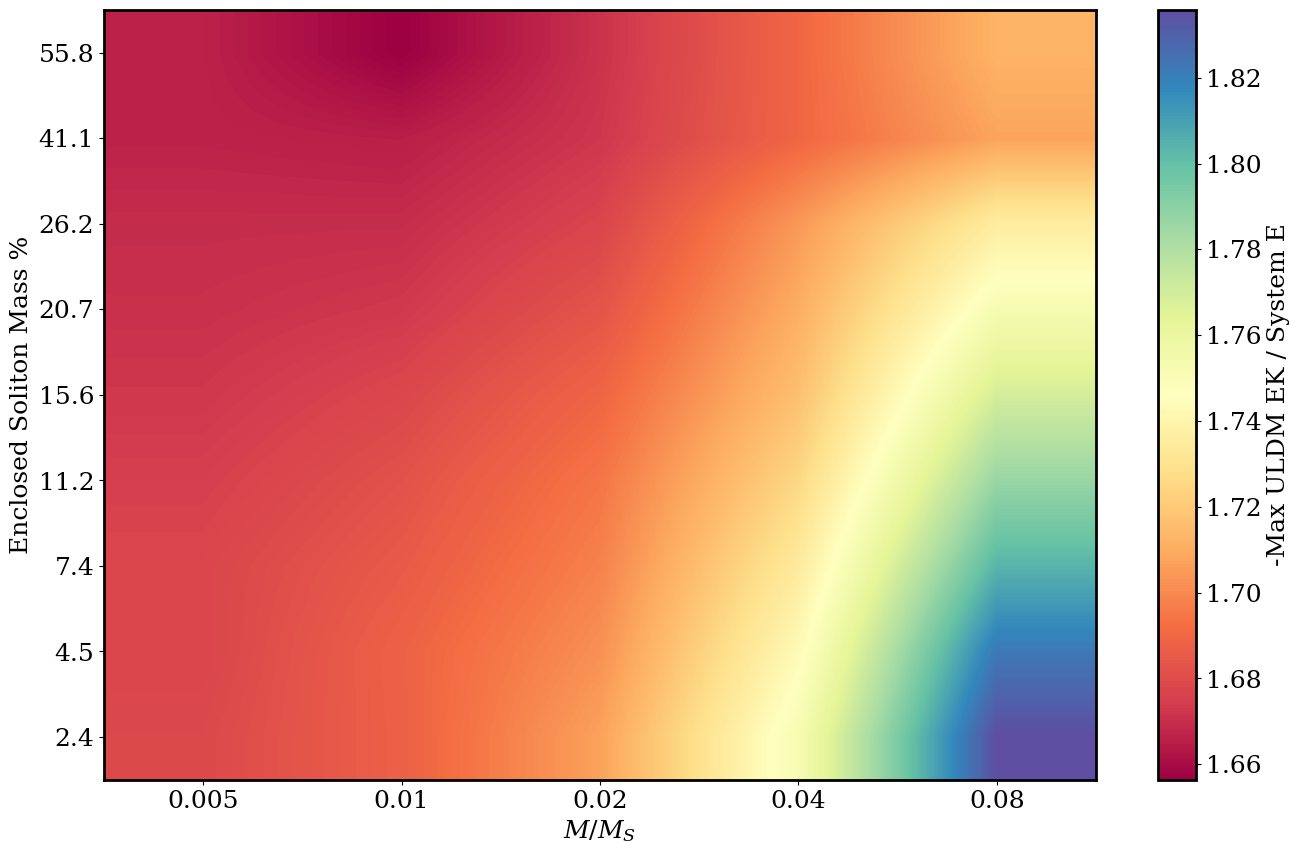

In [46]:
MaxKDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    MaxKDig.append(-np.max(ULKQLog[i])/np.mean(SysELog[i]))    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
MaxKDig = np.array(MaxKDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (16,10))

plt.imshow(MaxKDig, origin = 'lower', aspect = 'auto',
           cmap = 'Spectral',
          interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),MEnList)

plt.xlabel('$M/M_S$')
plt.ylabel('Enclosed Soliton Mass %')

plt.colorbar(label = '-Max ULDM EK / System E')

[0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.25 0.3 ]


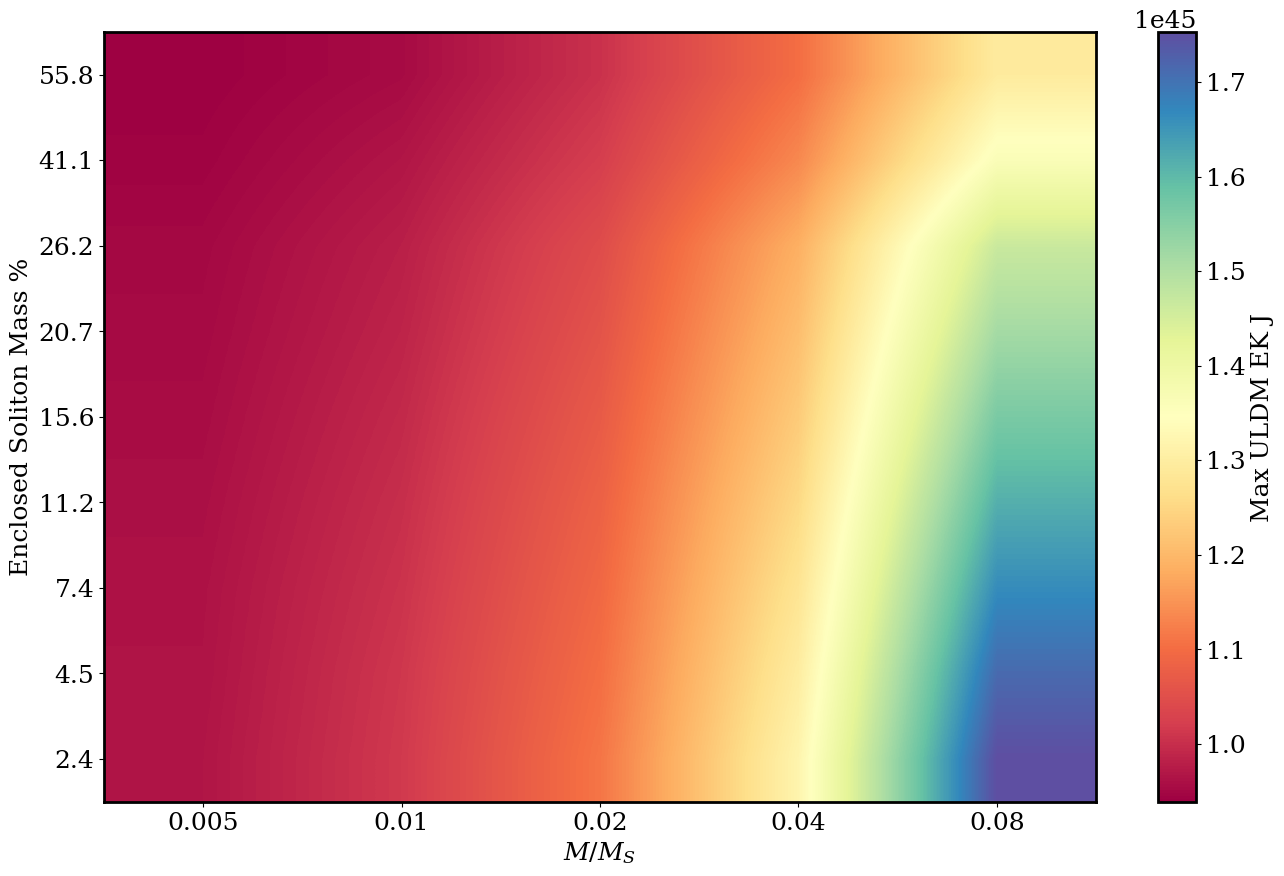

In [47]:
MaxKDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    MaxKDig.append(np.max(ULKQLog[i]))    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
MaxKDig = np.array(MaxKDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (16,10))

plt.imshow(MaxKDig, origin = 'lower', aspect = 'auto',
           cmap = 'Spectral',
          interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),MEnList)

plt.xlabel('$M/M_S$')
plt.ylabel('Enclosed Soliton Mass %')

plt.colorbar(label = 'Max ULDM EK J')

[0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.25 0.3 ]


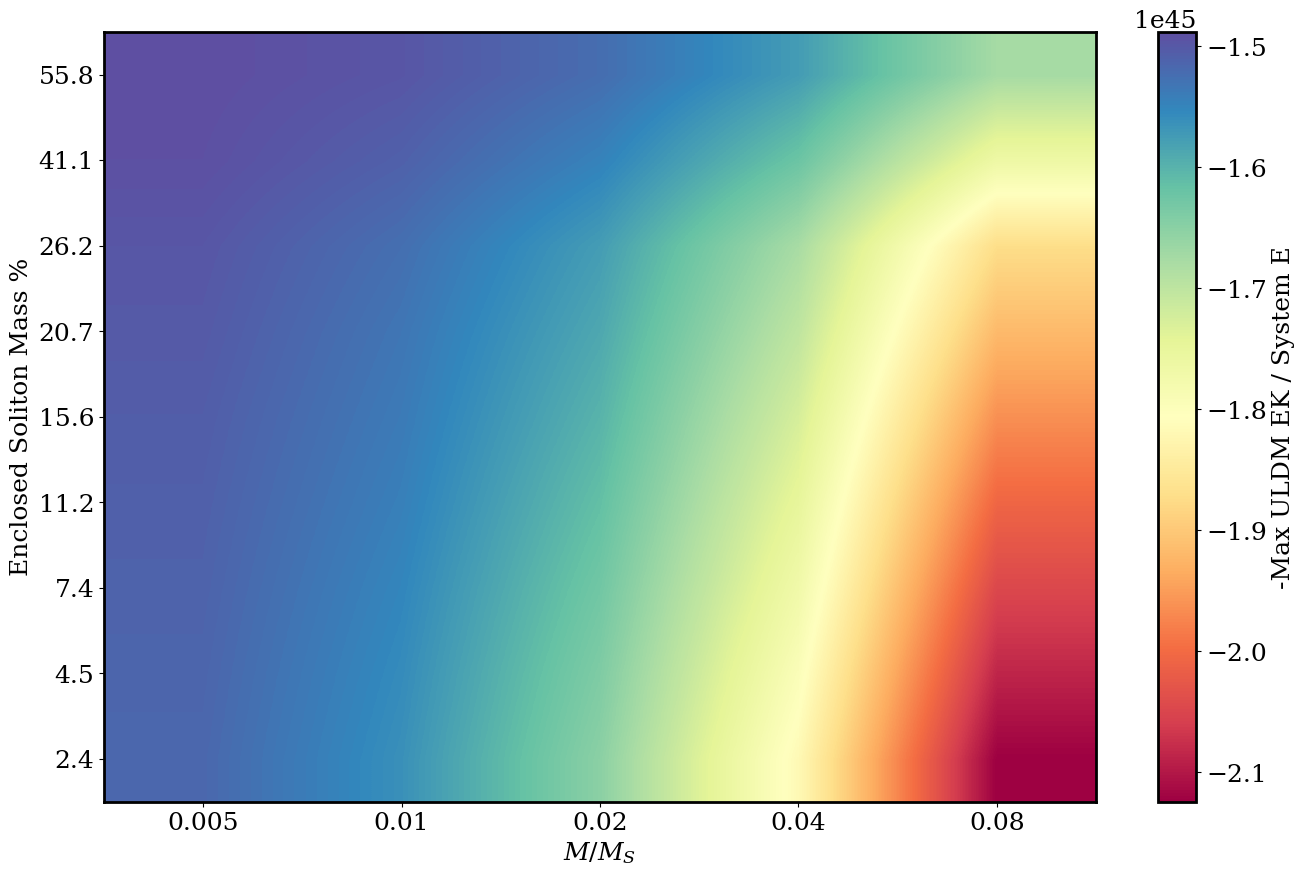

In [48]:
MinPDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    MinPDig.append(np.min(ULEPLog[i]))    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
MinPDig = np.array(MinPDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (16,10))

plt.imshow(MinPDig, origin = 'lower', aspect = 'auto',
           cmap = 'Spectral',
          interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),MEnList)

plt.xlabel('$M/M_S$')
plt.ylabel('Enclosed Soliton Mass %')

plt.colorbar(label = '-Max ULDM EK / System E')

[0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.25 0.3 ]


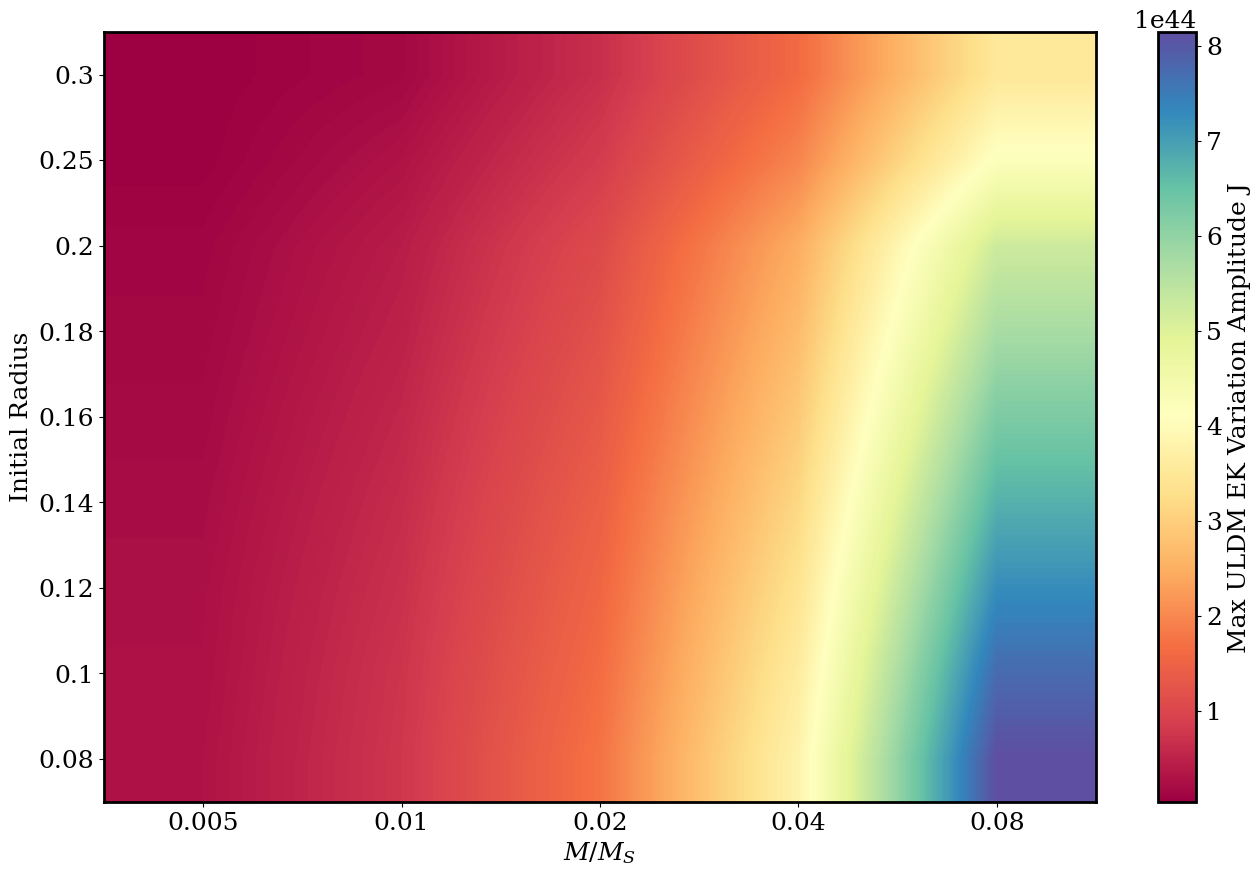

In [59]:
MaxKDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    MaxKDig.append(np.max((ULKQLog[i])-np.min(ULKQLog[i])))    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
MaxKDig = np.array(MaxKDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (16,10))

plt.imshow(MaxKDig, origin = 'lower', aspect = 'auto',
           cmap = 'Spectral',
          interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),RadList)

plt.xlabel('$M/M_S$')
plt.ylabel('Initial Radius')

plt.colorbar(label = 'Max ULDM EK Variation Amplitude J')

[0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.25 0.3 ]


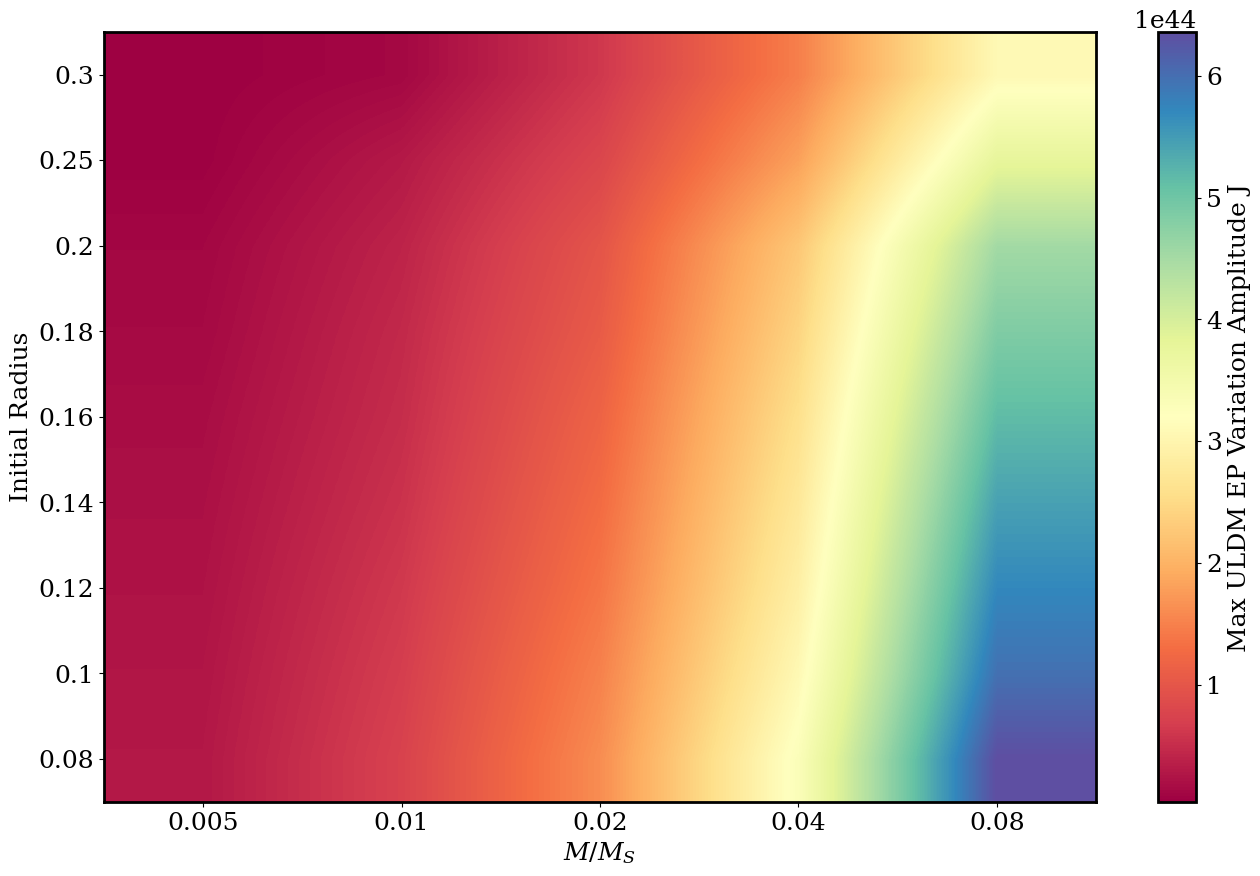

In [62]:
MaxKDig = []
RatDig = []
RadDig = []
MEnDig = []

for i in range(len(ResoLog)):
    MaxKDig.append(np.max((ULEPLog[i])-np.min(ULEPLog[i])))    
    RatDig.append(MaRaLog[i])
    RadDig.append(IniRLog[i])
    MEnDig.append(MEncLog[i])
    
MaxKDig = np.array(MaxKDig).reshape(9,5)
RatDig = np.array(RatDig).reshape(9,5)
RadDig = np.array(RadDig).reshape(9,5)
MEnDig = np.array(MEnDig).reshape(9,5)

RatList = RatDig[0,:]

RadList = RadDig[:,0]

MEnList = np.round(MEnDig[:,0]*100,1)

print(RadList)


plt.figure(figsize = (16,10))

plt.imshow(MaxKDig, origin = 'lower', aspect = 'auto',
           cmap = 'Spectral',
          interpolation = 'bilinear')

plt.xticks(np.arange(5),RatList)
plt.yticks(np.arange(9),RadList)

plt.xlabel('$M/M_S$')
plt.ylabel('Initial Radius')

plt.colorbar(label = 'Max ULDM EP Variation Amplitude J')

In [ ]:
fig = plt.figure(figsize = (10,7), dpi = 100)

ax = fig.add_subplot(111)

Color = plt.cm.hsv(np.linspace(0,1,len(ResoLog)))

RadSlice = 8


def ConditionE(i):
    
    return (IniRLog[i] == 0.3) 

for i in range(len(ResoLog)):
    
    Data = TMDSLog[i]
    
    if ConditionE(i):
    
        TraX, TraY = Data[:,1],Data[:,0]
    
        Radius = np.sqrt(TraX**2+TraY**2)
    
        ax.plot(TimeLog[i],Radius/Radius[0], lw = 2, alpha = 0.87,
               label = MaRaLog[i])
        print(TimeLog[i][-1])
    
axE.legend(fontsize= 7)


lengthSI = PyUL.convert_between(lengthKpc,'kpc','m','l')

ax.set_xlim(0,1230)
ax.set_xlabel('Time / Myr')
ax.set_ylabel('Relative Orbital Radius')

ax.legend(title = '$M:M_s$', fontsize = 12)


## Orbital Radius Decay Diagram

In [ ]:
fig = plt.figure(figsize = (10,8), dpi = 100)

BaseGrid = plt.GridSpec(2,1, hspace=0)

axSmo = fig.add_subplot(BaseGrid[0,0])
axLgr = fig.add_subplot(BaseGrid[1,0])

axSmo.set_xlim(0,1230)
axLgr.set_xlim(0,1230)

axSmo.set_xticks([])

axLgr.set_xlabel('Time / Myr')

Color = plt.cm.hsv(np.linspace(0,1,len(ResoLog)))

RadSlice = 8

for i in range(len(ResoLog)):
    
    Data = TMDSLog[i]
    
    if (IniRLog[i] == 0.3):
    
        TraX, TraY = Data[:,1],Data[:,0]
    
        Radius = np.sqrt(TraX**2+TraY**2)
    
        axLgr.plot(TimeLog[i],Radius*1000, lw = 2, alpha = 0.87,
               label = MaRaLog[i])

    if (IniRLog[i] == 0.08):
        
        TraX, TraY = Data[:,1],Data[:,0]
    
        Radius = np.sqrt(TraX**2+TraY**2)
    
        axSmo.plot(TimeLog[i],Radius*1000, lw = 2, alpha = 0.87,
               label = MaRaLog[i])




lengthSI = PyUL.convert_between(lengthKpc,'kpc','m','l')

axSmo.set_xlim(0,1230)
axSmo.set_xlabel('Time / Myr')



fig.text(0.04, 0.5, 'Distance from Centre of Mass / pc',
         va='center', rotation='vertical')

axLgr.legend(title = '$M:M_s$', fontsize = 12)



In [ ]:
Data[0,1]

## Lowest Energy Achieved

In [ ]:
save_path = 

## Loading Single

In [60]:
run_folder = PyUL.Runs(save_path)

PyUL2.Soliton: Loading Folder
[1]: 00
[2]: 01
[3]: 02
[4]: 03
[5]: 04
[6]: 05
[7]: 06
[8]: 07
[9]: 08
[10]: 09
[11]: 10
[12]: 11
[13]: 12
[14]: 13
[15]: 14
[16]: 15
[17]: 16
[18]: 17
[19]: 18
[20]: 19
[21]: 20
[22]: 21
[23]: 22
[24]: 23
[25]: 24
[26]: 25
[27]: 26
[28]: 27
[29]: 28
[30]: 29
[31]: 30
[32]: 31
[33]: 32
[34]: 33
[35]: 34
[36]: 35
[37]: 36
[38]: 37
[39]: 38
[40]: 39
[41]: 40
[42]: 41
[43]: 42
[44]: 43
[45]: 44
Which folder do you want to analyse? Blank to load the latest one. 'X[Number]' to Delete
45
ULHelper: Loading 44


In [61]:
loc = './' + save_path + '/' + run_folder
TimeStamp = run_folder
# Reload Config.. Why don't I use a class?
NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, UVel = PyUL.LoadConfig(loc)

if save_number == -1:
    sim_number = PyUL.ULDStepEst(duration,duration_units,
                                          length,length_units,
                                          resol,step_factor, 
                                          save_number = -1)
else:
    sim_number = save_number
    
# Dict of Run Data
EndNum, Loaded = PyUL.Load_npys(loc,save_options, LowMem = False)


Load2D = False
Load1D = False

if Load2D:
    #phasedata = Loaded['2Phase']
    #phidata  = Loaded['2Grav']
    #phidataF = Loaded['2GravF']
    data = Loaded['2Density']

if Load1D:
    #phi1D  = Loaded['1Grav']
    phiF1D = Loaded['1GravF']
    linedata = Loaded['1Density']

TMdata = Loaded['NBody']
graddata = Loaded['DF']

NBo = len(particles)

ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

# Time
durationMyr = CB(duration,duration_units,'Myr','t')

# Space
lengthKpc = CB(length,length_units,'kpc','l')
lengthC = ToCode(length,length_units,'l')

# Mass

MassList_MSol = []
MassListSI = []
for TM in particles:
    MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
    MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))
    
# Density
DensitySI = CB(Density,density_unit,'kg/m3','d')
DensityC = ToCode(Density,density_unit,'d')

## Misc. Pre-Multipliers

Tp = np.arange(EndNum)
Tp = Tp * durationMyr / (sim_number+1)

# NBody_State Vector

XPre = ToPhys(1,'kpc','l')
VPre = ToPhys(1,'km/s','v')

XPreSI = ToPhys(1,'m','l')
VPreSI = ToPhys(1,'m/s','v')

IArray = np.arange(len(TMdata[0]))

# Dimensionful NBody State

TMDataS = np.array(TMdata)
TMDataSI = np.array(TMdata)

TMDataS[:,IArray % 6 <= 2] *= XPre
TMDataS[:,IArray % 6 >= 3] *= VPre

TMDataSI[:,IArray % 6 <= 2] *= XPreSI
TMDataSI[:,IArray % 6 >= 3] *= VPreSI

# Rho data
DPre = CB(1,density_unit,'kg/m3','d')

# Energy
EPre = PyUL.energy_unit

# Field Strength
PPre = PyUL.mass_unit / PyUL.length_unit

# Momentum
pPreSI = PyUL.mass_unit * VPreSI

# Angular Momentum
LPreSI = pPreSI * PyUL.length_unit

if save_options[18]:
    i = 0
    pData = []
    Success = True

    while Success:

        try:
            pData.append(pPreSI*np.load(f'{loc}/Outputs/PMT_#{i:03d}.npy'))
            i+=1
        except:
            Success = False
            
if save_options[19]:
    i = 0
    LData = []
    Success = True

    while Success:

        try:
            LData.append(LPreSI*np.load(f'{loc}/Outputs/MVR_#{i:03d}.npy'))
            i+=1
        except:
            Success = False
    

print('Unit conversion ready!')


print("==============================================")
print(f"PyULN: Axion Mass Used is {PyUL.axion_E} eV.\n")

print(f"\
1 Mass Unit    = {PyUL.mass_unit:.5g} kg = {PyUL.convert_back(1,'solar_masses','m'):.4g} MSol\n\
1 Length Unit  = {PyUL.length_unit:.5g} m  = {PyUL.convert_back(1,'kpc','l'):.4g} kpc\n\
1 Time Unit    = {PyUL.time_unit:.5g} s  = {PyUL.convert_back(1,'Myr','t')/1000:.4g} Gyr\n\n\
1 Density Unit = {PyUL.mass_unit/PyUL.length_unit**3:.5g} kg/m^3 = {PyUL.mass_unit/PyUL.length_unit**3/PyUL.CritDens} Critical Density\n\
1 Speed Unit   = {PyUL.length_unit/PyUL.time_unit:.5g} m/s\n\
1 Energy Unit  = {EPre:.5g} Joules\n")

Loaded = {}

PyUL2.LoadNPY: Loaded 201 Data Entries from ././Batches/MR_Final_Hires/44
Unit conversion ready!
PyULN: Axion Mass Used is 1e-21 eV.

1 Mass Unit    = 1.401e+35 kg = 7.044e+04 MSol
1 Length Unit  = 3.7436e+20 m  = 12.13 kpc
1 Time Unit    = 2.3694e+18 s  = 75.13 Gyr

1 Density Unit = 2.6705e-27 kg/m^3 = 0.31 Critical Density
1 Speed Unit   = 157.99 m/s
1 Energy Unit  = 3.4972e+39 Joules



## 2D Preview

NameError: name 'data' is not defined

<Figure size 640x480 with 0 Axes>

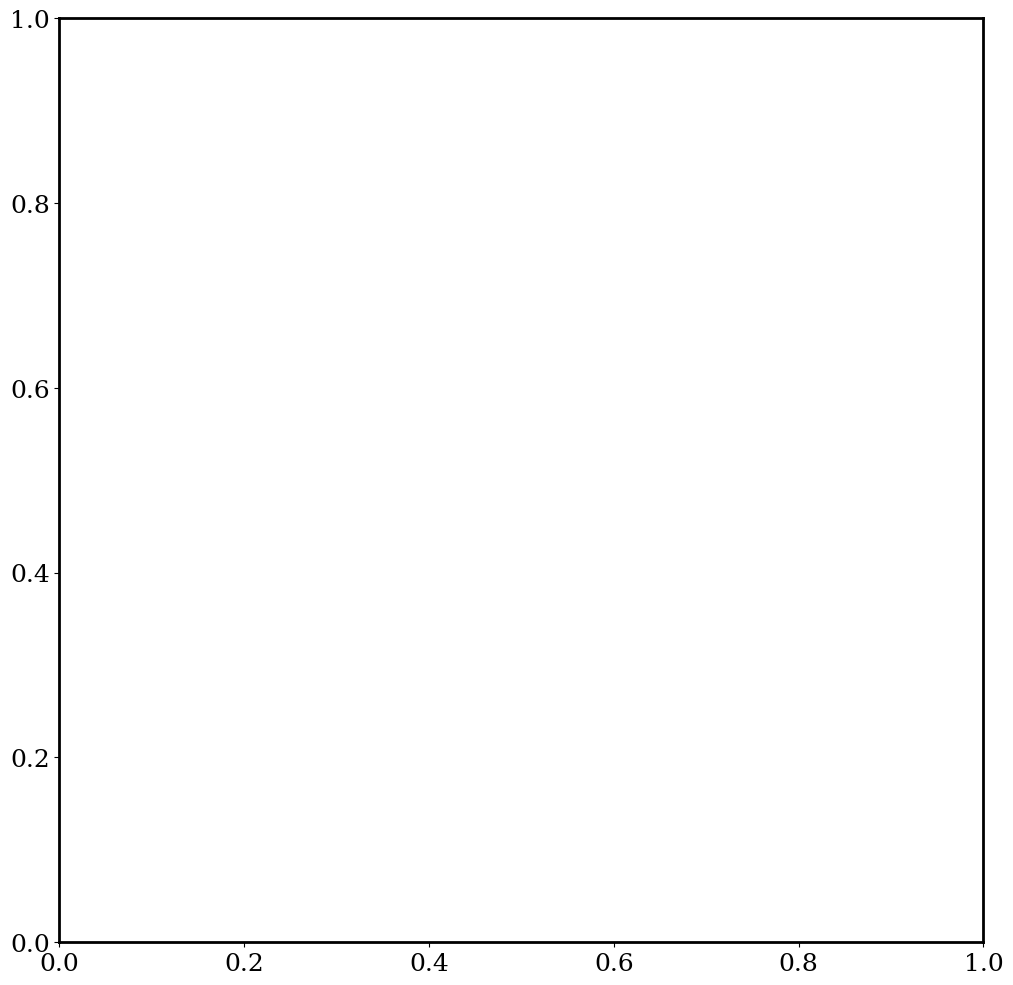

In [62]:
Ncol=['#327bab','#ddb877','#ff0000']

Palette  = LinearSegmentedColormap.from_list('myDiv', Ncol)

# Number of ULDM SlicesIN BETWEEN start and end (which are always plotted).
NSlices = EndNum // 500
Zoom2D = 1

if NSlices >= EndNum:
    
    NSlices = EndNum

try:
    TSD = TimeStamp
except NameError:
    TimeStamp = 'Debug'

plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

Boundary = lengthKpc/(2*Zoom2D)

#plt.xlim([-Boundary,Boundary])
#plt.ylim([-Boundary,Boundary])

ax.set_aspect('equal', adjustable='box')

TMx = TMDataS[:,1::6]
TMy = TMDataS[:,0::6]

    
planemax = np.max(data)
planemin = np.min(data)

levels = np.linspace(0, planemax, 50)

PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)



#plt.contour(PlotRange,PlotRange,data[1], levels=levels,cmap = Palette)
plt.contour(PlotRange,PlotRange,data[-1], levels=levels,cmap = Palette)

plt.scatter([TMx[0]],[TMy[0]],color = 'k')
plt.scatter([TMx[-1]],[TMy[-1]],color = 'k')


if NSlices != 0 and EndNum >= NSlices:

    Blink = EndNum/(NSlices+1)

    Index = np.linspace(Blink,EndNum-Blink,NSlices)
    
    JU = 0
    for Ind in Index:
        j = int(Ind)

        plt.scatter([TMx[j]],[TMy[j]],color = 'k',zorder = 100+j)
        plt.contour(PlotRange,PlotRange,data[j], levels=levels,cmap = Palette, alpha = JU/NSlices/1.2)

        PyUL.prog_bar(iteration_number = NSlices, progress = j, tinterval = 0 ,status = '',adtl = '')
        JU+=1
   

Info = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    r'Resolution: $%.0f^3$' % (resol, ),
    r'Box Length: %.3g kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3g Myr' % (durationMyr, ),
    r'Saved Snapshots: %.0f (%.0f Plotted)' % (EndNum,NSlices + 2)
    ))


TraX, TraY = InterpolateCurve(TMx,TMy)

ax.plot(TraX,TraY,'--', lw = 1, color = 'k')

ZoomOut = 0.5

ax.set_xlim(np.min(TMx)-ZoomOut,np.max(TMx)+ZoomOut)
ax.set_ylim(np.min(TMy)-ZoomOut,np.max(TMy)+ZoomOut)
    
ax.set_ylabel('$y$ / kpc')
ax.set_xlabel('$x$ / kpc')


plt.show()

PyUL2. NBoE: The Plummer Radius is 0.0117(kpc)
PyUL2. NBoE: Reconstructing Potential and Kinetic Energies for 1 stored objects.
44
Number of Bodies: $1$


<Figure size 640x480 with 0 Axes>

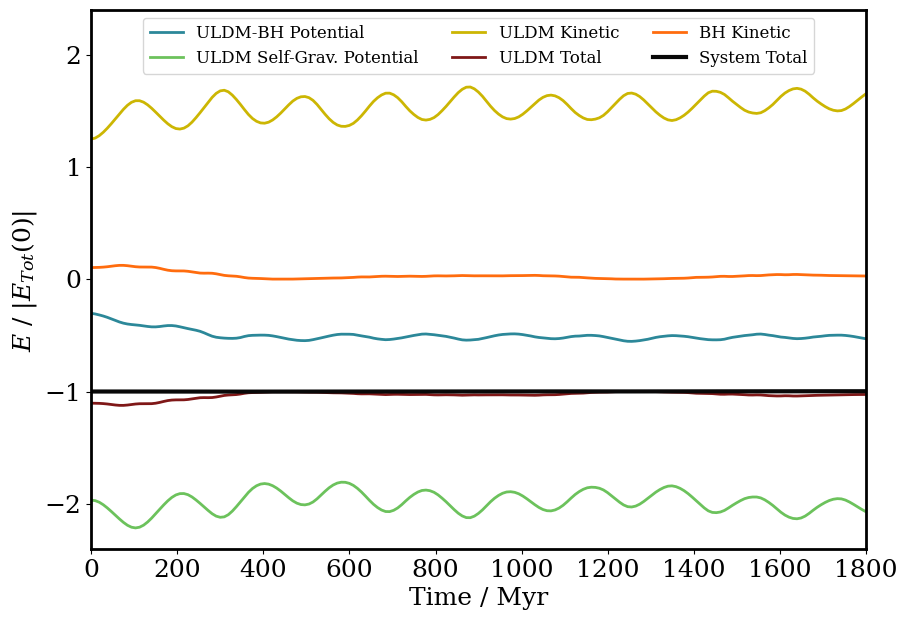

In [101]:
Relative = False # For Dynamical Friction Cases Only

EFigSize = (10,6.18)
EFigSize_Mono = (10,5)

Snap = False
loc = save_path + '/' + run_folder

plt.clf()

#==================================================================================================
## Naming
EnergyName = '{}{}{}'.format("./",loc,"/Energy_Total.jpg")
Energy3Name = '{}{}{}'.format("./",loc,"/Energy_Total_Raw.jpg")
EnergyNName = '{}{}{}'.format("./",loc,"/Energy_NBody.jpg")
EnergyUName = '{}{}{}'.format("./",loc,"/Energy_UP.jpg")
EnergyDName = '{}{}{}'.format("./",loc,"/Energy_Delta.jpg")
EnergyMName = '{}{}{}'.format("./",loc,"/Energy_Mech.jpg")
EnergyD2Name = '{}{}{}'.format("./",loc,"/Energy_Pct.jpg")

#==================================================================================================
## Analysis
#
# Raw ULDM Energy

# Total Energy from Integrator
egylist = np.load('{}{}'.format(loc, '/Outputs/egylist.npy'),allow_pickle=True) * EPre

# Energy Due to N Body Potential
egpcmlist =  np.load('{}{}'.format(loc, '/Outputs/egpcmMlist.npy'),allow_pickle=True) * EPre # NEW
egpcmlist2 = np.load('{}{}'.format(loc, '/Outputs/egpcmlist.npy'),allow_pickle=True) * EPre # OLD

# Energy Due to ULDM Self-Interaction
egpsilist = np.load('{}{}'.format(loc, '/Outputs/egpsilist.npy'),allow_pickle=True) * EPre

# Energy Due to Quantum Fun
ekandqlist = np.load('{}{}'.format(loc, '/Outputs/ekandqlist.npy'),allow_pickle=True) * EPre

mtotlist = np.load('{}{}'.format(loc, '/Outputs/masseslist.npy'),allow_pickle=True) * EPre

# Uniform Correction Performed in Integrator!

# Reconstruct NBody Energy (Real)
NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum, a, length_units)

# Reconstruct NBody Energy (Physical)
# NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum)

if Relative:
    K0 = KS[0] #  Need attention
    EUnit = '$E_k(0)$'
    
    if UVel != [0,0,0]:
        
        VRelSI = CB(np.linalg.norm(UVel),s_velocity_unit,'m/s','v')
        
        printU(f'Initial Relative Speed is {VRelSI:.3f} m/s','QW')
        
        K0 = 1/2*MassListSI[0]*(VRelSI)**2

else: 
    K0 = 1
    EUnit = 'J'
# Processed ULDM Energy

MES = (PS + KS)
MESD = PyUL.GetRel(MES)/K0

EKQD = PyUL.GetRel(ekandqlist)/K0
EGPD = PyUL.GetRel(egpsilist)/K0

ECMD = PyUL.GetRel(egpcmlist)/K0
ECOD = PyUL.GetRel(egpcmlist2)/K0

KSD = PyUL.GetRel(KS)/K0
PSD = PyUL.GetRel(PS)/K0

EUOld  = egylist
EUOldD = PyUL.GetRel(EUOld)/K0

EUNew  = egpsilist + ekandqlist + egpcmlist2
EUNewD = PyUL.GetRel(EUNew)/K0

ETOld  = EUOld + MES
ETOldD = PyUL.GetRel(ETOld)/K0

ETNew  = EUNew + MES
ETNewD = PyUL.GetRel(ETNew)/K0

EROld = ETOld / ETOld[0]

ERNew = ETNew / ETNew[0]


#==================================================================================================
## Compile Printing Boxes

SimInfo = '\n'.join((
    TimeStamp,
    r'Resolution: $%.0f^3$' % (resol, ),
    r'Box Length: %.3f kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3f Myr' % (durationMyr, )
    ))

NBodyInfo = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    ))

print(NBodyInfo)

##==================================================================================================
### Plots
#==================================================================================================
# Total Energy Diagram
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)

ERel = np.abs(ETNew[0])



ax.plot(Tp,egpcmlist/ERel,EUStyle,color = EGColor,label='ULDM-BH Potential')
ax.plot(Tp,egpsilist/ERel,EUStyle,color = ERColor,label='ULDM Self-Grav. Potential')
ax.plot(Tp,ekandqlist/ERel,EUStyle,color = EQColor,label='ULDM Kinetic')

ax.plot(Tp,EUNew/ERel,ETStyle,color = EUColor,label='ULDM Total')


ax.plot(Tp,KS/ERel,ENStyle,color = ENColor,label = 'BH Kinetic')
    
ax.plot(Tp,ETNew/ERel,ETStyle,color = ETColor, label = 'System Total', lw = 3)
ax.set_ylabel(f'$E \ / \ |E_{{Tot}}(0)|$ ')

ax.legend(ncol=3, fontsize = 12, loc = 9)

plt.xlabel('Time / Myr')

plt.xlim(0,1800)
plt.ylim(-2.4,2.4)

plt.show()

